In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
torch.__version__ # the version should always be more than 1.10

'2.6.0+cu124'

In [ ]:
# Creating known parameters
weight = 0.7
bias = 0.3

# Create a dataset
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
# Splitting data into training and test sets (most important concept in ML)
train_split = int(0.8* len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

**We should always  VISUALIZE,VISUALIZE,VISUALIZE !**



In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions= None):

# Plot the training data in blue
    plt.scatter(train_data,train_labels,c='b',s=10, label='Training Data')

# Plot the testing data in green
    plt.scatter(test_data,test_labels,c='g',s=10, label='Testing Data')

# If there is prediction then plot it
    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=10,label='Predictions')
    plt.legend();

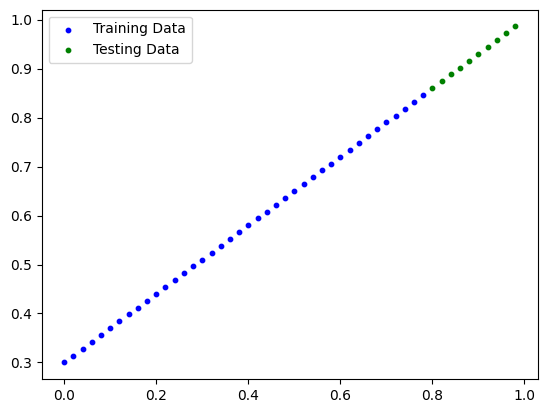

In [ ]:
# Function call
plot_predictions()

**Forward method**

 If you use nn.Module, you almost always define a forward method.
It’s the core method that tells PyTorch what your model does when it receives input

**Type hint**

**SYNTAX**

def function_name(...) -> return_type:

*def forward(self, x: torch.Tensor) -> torch.Tensor:*

 It’s a way to tell Python what kind of data a variable is expected to have.



In [ ]:
from torch import nn

# Create Linear regression model class

class LinearRegressionModel(nn.Module):  # Almost evrerything from PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,                   # starts with random number, thats why randn
                                            requires_grad=True,  # Updates the parameter with Gradient descent
                                           dtype=torch.float))  # coz PyTorch loves float datatype
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    # Forward method to define computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:  # x is the inpu data and we are telling it to be in data type - Tensor
       return self.weights*x + self.bias # Linear regression formula


**PyTorch model building essentials**

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()

* torch.optim - this is where the optimizers in PyTorch live, they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

  See more of these essential modules via the PyTorch cheatsheet – https://pytorch.org/tutorials/beginner/ptcheat.html

In [ ]:
# Creating a random seed
torch.manual_seed(42)

# Create an instance of the model (subclass of nn.module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

*model.state_dict()*
  
  Get all learnable parameters (weights, biases)

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Making Predictions using torch.inference_mode()

To check our model's predictive power, let's see how well it predicts y_test based on x_test.

When we pass data through our model, it's going to run it through forward() method.


**with torch.inference_mode()**

Tells PyTorch: We’re just making predictions. Don’t track gradients, don’t waste memory.”






Why is this important?
During training, PyTorch tracks all operations to calculate gradients.

During inference (testing), you don’t need gradients — so turning it off:

Saves memory

Speeds things up

In [ ]:
# make predictions with model
with torch.inference_mode():
   y_preds = model_0(X_test)

#with torch.no_grad():   This also does he same as inference_mode but this is not preferred
  #y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

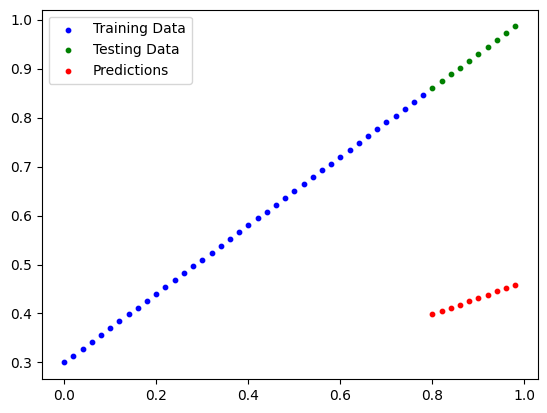

In [ ]:
plot_predictions(predictions=y_preds)

This is a random prediction

# Train model


The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model’s predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we’re going to refer to it as a loss function.

Things we need to train:

**Loss function:** A function to measure how wrong your model’s predictions are to the ideal outputs, lower is better.

**Optimizer:** Takes into account the loss of a model and adjusts the model’s parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need:

*  A training loop
*  A testing loop





In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Setup Loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic gradient descent)

optimizer = torch.optim.SGD(params =model_0.parameters(),
                            lr=0.01) # most important hyperparameter we will set and it should always be a small number


**Q :** Which loss function and optimizer should I use ?

**A :**This knowledge can be gained only through practice and experience.
Each problem might require different type of loss function and optimizer

For example - For this regression problem we need **nn.L1Loss()** and **torch.optim.SGD()** is enough

But for classification problem like classifying whether a photo is a dog or cat we need **nn.BCELoss()** -- Binary cross entropy loss

### Building a training loop and a testing loop in PyTorch

A couple of things we need for training loop :

0. Loop through the data
1. Forward pass - Using Model's Forward function - also called as  Forward Propagation
2.Calculate the loss (Compare forward pass predictions to ground truth lables)
3. Optimizer zero grad
4.Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss [**Back propagation**]
5. Optimizer step - Use the Optimizer to adjust our model's paramters to try and improve the loss [**Gradient descent**]


In [ ]:
torch.manual_seed(42)
# An epoch is one loop through the data.. (This is hyperparamter coz we have set it)

epochs = 50
### Training
 # 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train()  # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2.Calculate the loss
  loss = loss_fn(y_pred,y_train)
  print(f"Loss value : {loss}")
  #3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform Back propagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5.Step the optimizer (perform gradient descent)
  optimizer.step() # By default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration

  ### Testing
  model_0.eval() # Turns off gradients or gradient tracking



Loss value : 0.31288138031959534
Loss value : 0.3013603389263153
Loss value : 0.28983935713768005
Loss value : 0.2783183455467224
Loss value : 0.26679736375808716
Loss value : 0.2552763521671295
Loss value : 0.24375534057617188
Loss value : 0.23223432898521423
Loss value : 0.22071333229541779
Loss value : 0.20919232070446014
Loss value : 0.1976713240146637
Loss value : 0.18615034222602844
Loss value : 0.1746293306350708
Loss value : 0.16310831904411316
Loss value : 0.1515873372554779
Loss value : 0.14006635546684265
Loss value : 0.1285453587770462
Loss value : 0.11702437698841095
Loss value : 0.1060912236571312
Loss value : 0.09681284427642822
Loss value : 0.08908725529909134
Loss value : 0.08227583020925522
Loss value : 0.07638873159885406
Loss value : 0.07160007208585739
Loss value : 0.06747635453939438
Loss value : 0.06395438313484192
Loss value : 0.06097004935145378
Loss value : 0.05845819041132927
Loss value : 0.05635259300470352
Loss value : 0.0545857772231102
Loss value : 0.0531

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4920])), ('bias', tensor([0.3848]))])

### Does train() actually train the model?
No! It only tells the model:

"We're in training mode. Behave like you're training."



In **eval() + inference_mode()**, gradients are disabled to save memory

### **Learning rate scheduler**

The typical syntax for implementing a learning rate scheduler involves instantiating an optimizer and a scheduler, then stepping through epochs or batches, updating the learning rate accordingly. The versatility of the scheduler is reflected in its ability to accommodate various parameters, allowing practitioners to tailor its behavior to meet specific training requirements.

### **Learning rate scheduler syntax**

   #import torch.optim.lr_scheduler as lr_scheduler
   #from torch.optim.lr_scheduler import StepLR

   #optimizer = optim.SGD(model.parameters(), lr=0.1)
   #scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

   #Training loop
   #for epoch in range(num_epochs):
   #train()
   #scheduler.step()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4920])), ('bias', tensor([0.3848]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


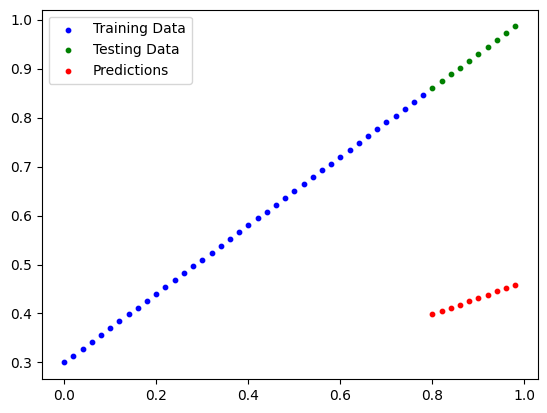

In [ ]:
plot_predictions(predictions=y_preds)

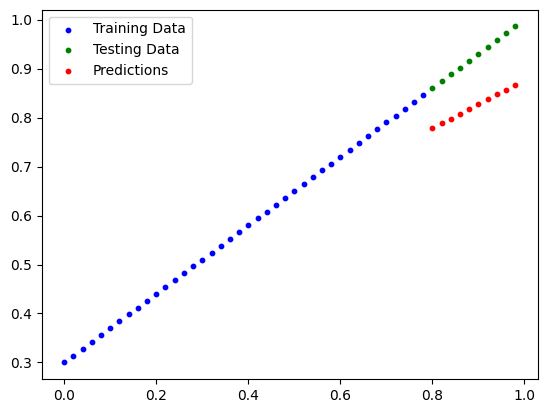

In [ ]:
plot_predictions(predictions=y_preds_new)